# DeepNMF Tests

In [1]:
# Add the module to our path:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Load the models:
sys.path.append("../../../bin")
from models import NMFImputer
from deep_models import DeepNMFImputer

os.makedirs("figures", exist_ok=True)

## Test on a toy dataset

In [2]:
def mse(x, y):
    mse = np.linalg.norm(x.ravel() - y.ravel())**2
    return mse / len(y.ravel())

Here's a simple grayscale image provided by scikit-image:

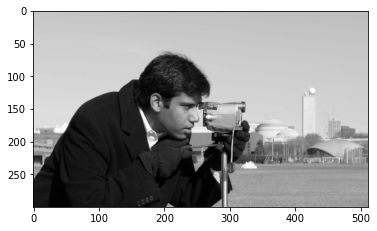

In [3]:
img = data.camera().astype(float)[:300, :]
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

First we'll use the our NMF implementation:

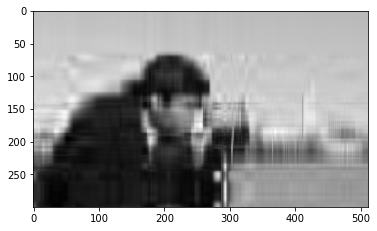

In [4]:
my_nmf = NMFImputer(10, max_iter=2000)
my_nmf.fit(img)
my_recon = my_nmf.transform()
my_mse = mse(img, my_recon)

# Plot the reconstruction:
plt.imshow(my_recon, cmap="gray")
plt.show()

In [ ]:
deepnmf = DeepNMFImputer(10, layers=(10,), max_epochs=1)
deepnmf.fit(img)

torch.Size([153600, 2]) torch.Size([153600])


/usr/local/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([153600])) that is different to the input size (torch.Size([153600, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


## Now we'll try with missing data

First we'll create a mask for missing data:

In [ ]:
frac_missing = 0.20
total = np.prod(img.shape)
num_missing = int(frac_missing * total)

na_mask = np.full(total, False)
na_mask[:num_missing] = True
np.random.shuffle(na_mask)

na_mask = na_mask.reshape(img.shape)
na_mask

Now we can use the mask to pretend some values are missing:

In [ ]:
img_missing = img.copy()
img_missing[na_mask] = np.nan
img_missing

In [ ]:
plt.imshow(img_missing, interpolation="nearest", cmap="gray")
plt.show()

Now we can try and impute the values:

In [ ]:
miss_nmf = NMFImputer(50, max_iter=2000)
miss_recon = miss_nmf.fit_transform(img_missing)

plt.imshow(miss_recon, interpolation="nearest", cmap="gray")
plt.show()

In [ ]:
miss_idx = np.isnan(img_missing)
imputed = img_missing.copy()
imputed[miss_idx] = miss_recon[miss_idx]

truth = img[miss_idx]
imp = miss_recon[miss_idx]
imp_mse = mse(truth, imp)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(6, 3))
axs[0].imshow(img, cmap="gray")
axs[1].imshow(img_missing, interpolation="nearest", cmap="gray")
axs[2].imshow(imputed, interpolation="nearest", cmap="gray")

axs[0].set_title("Original")
axs[1].set_title("20% Missing")
axs[2].set_title(f"Imputed\nMSE = {int(imp_mse)}")

for ax in axs:
    ax.set_axis_off()

plt.tight_layout()
plt.savefig("figures/impute.png", dpi=300)

In [ ]:
import torch
torch.tensor([[1, 2, 3], [4, 5, 6]])[:, 1]